<a href="https://colab.research.google.com/github/HassanFrazKhan/Bitcoin-Prices-Predicting-with-ML-/blob/main/Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preparation**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch Bitcoin data
end_date = datetime.today().strftime('%Y-%m-%d')
btc_data = yf.download("BTC-USD", start="2020-01-01", end=end_date, interval="1d")

# Ensure the data is sorted by date
btc_data.sort_index(inplace=True)

# Calculate features using only past data (shifted by 1 day)
btc_data['MA_5'] = btc_data['Close'].rolling(window=5).mean().shift(1)
btc_data['MA_10'] = btc_data['Close'].rolling(window=10).mean().shift(1)
btc_data['MA_50'] = btc_data['Close'].rolling(window=50).mean().shift(1)

# Calculate Daily Returns (shifted by 1 day)
btc_data['Daily_Returns'] = btc_data['Close'].pct_change().shift(1) * 100

# Calculate Volatility (Rolling Standard Deviation of Returns, shifted by 1 day)
btc_data['Volatility'] = btc_data['Daily_Returns'].rolling(window=10).std().shift(1)

# Drop rows with NaN values (due to shifting and rolling calculations)
btc_data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = btc_data[['MA_5', 'MA_10', 'MA_50', 'Daily_Returns', 'Volatility']]
y = btc_data['Close']

# Split data based on time
train_data = btc_data[btc_data.index < '2023-01-01']
test_data = btc_data[btc_data.index >= '2023-01-01']

X_train = train_data[['MA_5', 'MA_10', 'MA_50', 'Daily_Returns', 'Volatility']]
y_train = train_data['Close']
X_test = test_data[['MA_5', 'MA_10', 'MA_50', 'Daily_Returns', 'Volatility']]
y_test = test_data['Close']

train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")
X_train.to_csv("train_features.csv")
y_train.to_csv("train_target.csv")
X_test.to_csv("test_features.csv")
y_test.to_csv("test_target.csv")


[*********************100%***********************]  1 of 1 completed


### **Average Price (Daily, Weekly, Monthly, Yearly)**

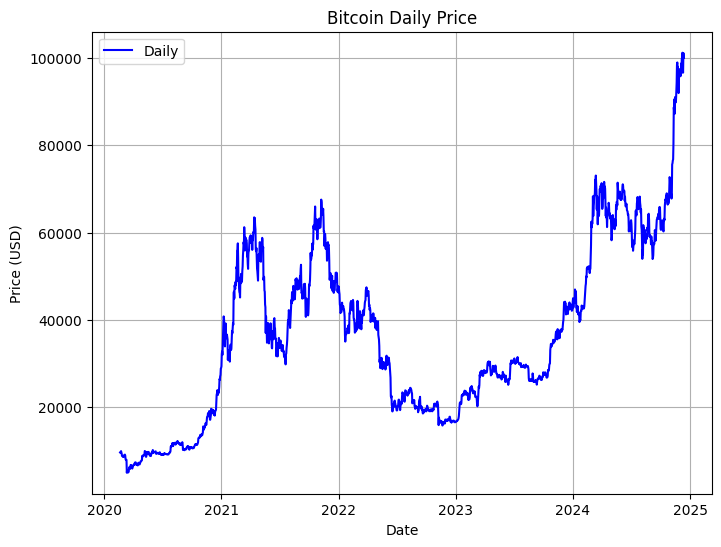

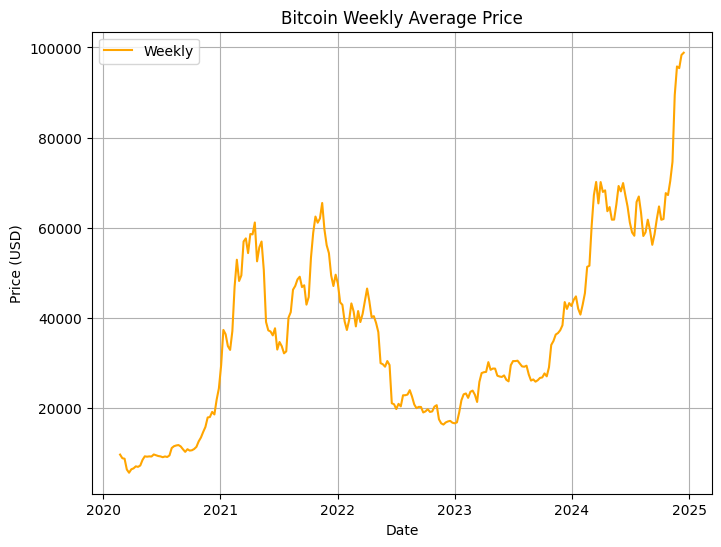

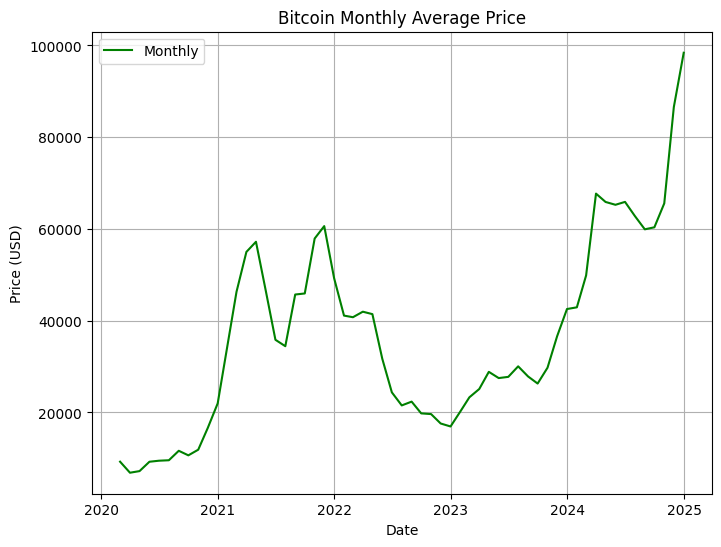

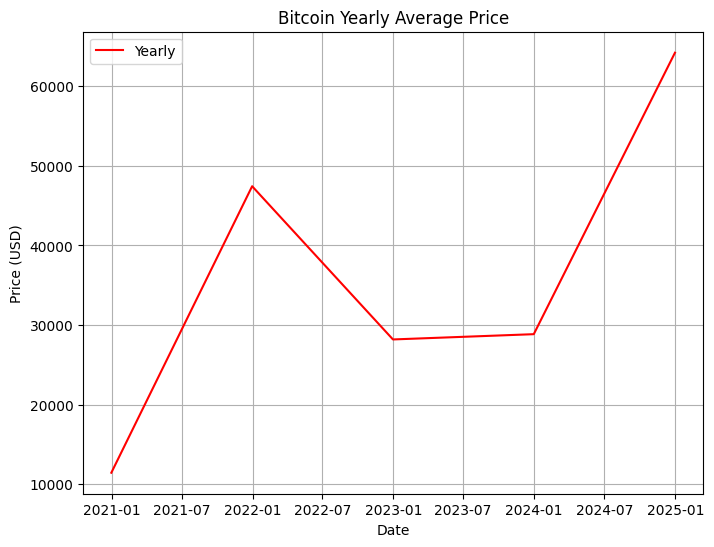

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset index and set Date as datetime index
btc_data.reset_index(inplace=True)
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Daily Chart
plt.figure(figsize=(8, 6))
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Daily')
plt.title('Bitcoin Daily Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()

print("\n" * 3)


# Weekly Chart
weekly_data = btc_data['Close'].resample('W').mean()
plt.figure(figsize=(8, 6))
plt.plot(weekly_data.index, weekly_data, color='orange', label='Weekly')
plt.title('Bitcoin Weekly Average Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()

print("\n" * 3)


# Monthly Chart
monthly_data = btc_data['Close'].resample('ME').mean()
plt.figure(figsize=(8, 6))
plt.plot(monthly_data.index, monthly_data, color='green', label='Monthly')
plt.title('Bitcoin Monthly Average Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()

print("\n" * 3)


# Yearly Chart
yearly_data = btc_data['Close'].resample('YE').mean()
plt.figure(figsize=(8, 6))
plt.plot(yearly_data.index, yearly_data, color='red', label='Yearly')
plt.title('Bitcoin Yearly Average Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(visible=True)
plt.show()




### **Linear Regression Model**



In [3]:

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.4f}")
print("Model Coefficients:", model_lr.coef_)


Linear Regression Results:
Mean Absolute Error (MAE): 1144.55
Root Mean Squared Error (RMSE): 1717.11
R-squared (R²): 0.9928
Model Coefficients: [[ 1.44797274e+00 -4.51517892e-01 -2.38971962e-03  2.03597302e+02
   2.64710510e+01]]


### **Random Forest Regressor**



In [4]:

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Results:
Mean Absolute Error (MAE): 3475.12
Root Mean Squared Error (RMSE): 7688.57
R-squared (R²): 0.8561


### **Actual vs Predicted (Linear Regression and Random Forest)**


Feature Importances:
('MA_5', ''): 0.9485
('MA_10', ''): 0.0209
('MA_50', ''): 0.0247
('Daily_Returns', ''): 0.0037
('Volatility', ''): 0.0020


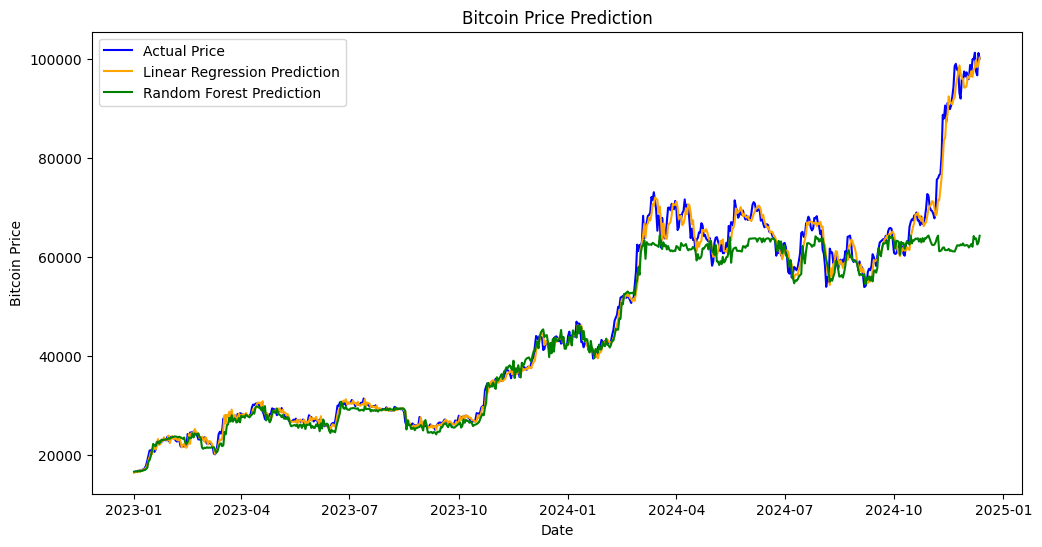

In [5]:

# Feature importance
feature_importance = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Prediction', color='orange')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()


### **LSTM**

In [6]:
#LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

btc_close = btc_data[['Close']].values  # Use only the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_close)

# Prepare data for LSTM
sequence_length = 60  # Look-back window of 60 days
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape data for LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Model Training

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20)

# Predict on test data
test_predictions = model.predict(X_test)
test_predictions_unscaled = scaler.inverse_transform(test_predictions)

# Actual test values
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))


mae = mean_absolute_error(y_test_unscaled, test_predictions_unscaled)
rmse = np.sqrt(mean_squared_error(y_test_unscaled, test_predictions_unscaled))
r2 = r2_score(y_test_unscaled, test_predictions_unscaled)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0168
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0020
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0021
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0014
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0012
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0012
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0011
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0012
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0011
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 9.5794e-04
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.3040e-04
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 8.3495e-04
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 9.5443e-04
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 8.4145e-04
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step

### **Actual Vs Predicted (LSTM)**

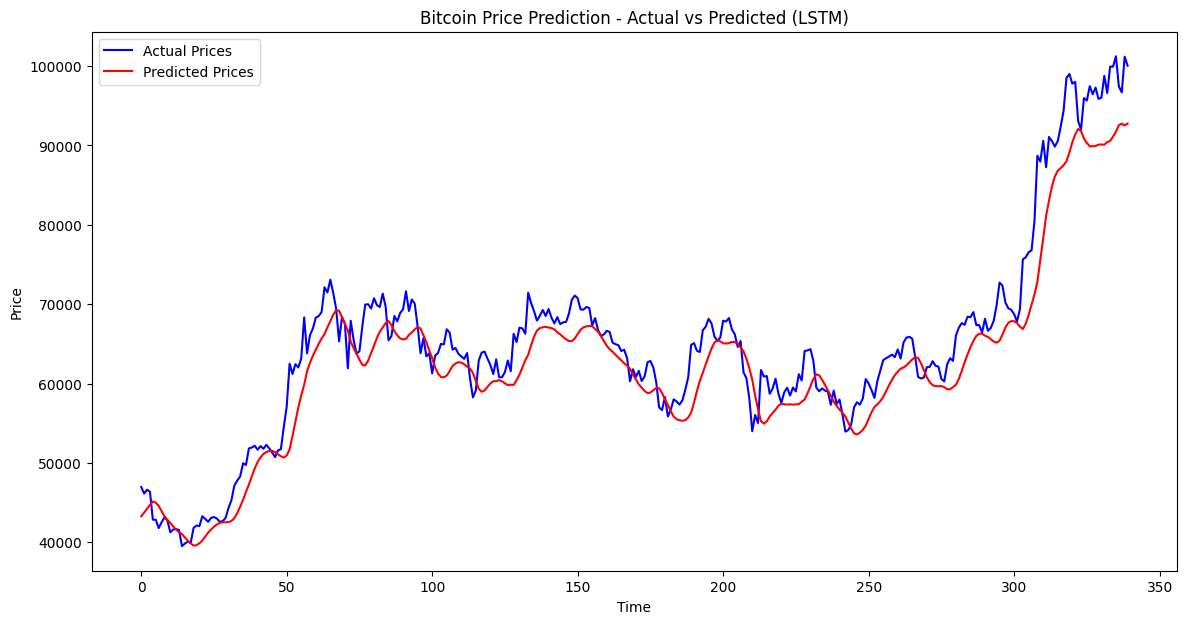

In [7]:
# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_unscaled, color='blue', label='Actual Prices')
plt.plot(test_predictions_unscaled, color='red', label='Predicted Prices')
plt.title('Bitcoin Price Prediction - Actual vs Predicted (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Future Price Prediction Using LSTM**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

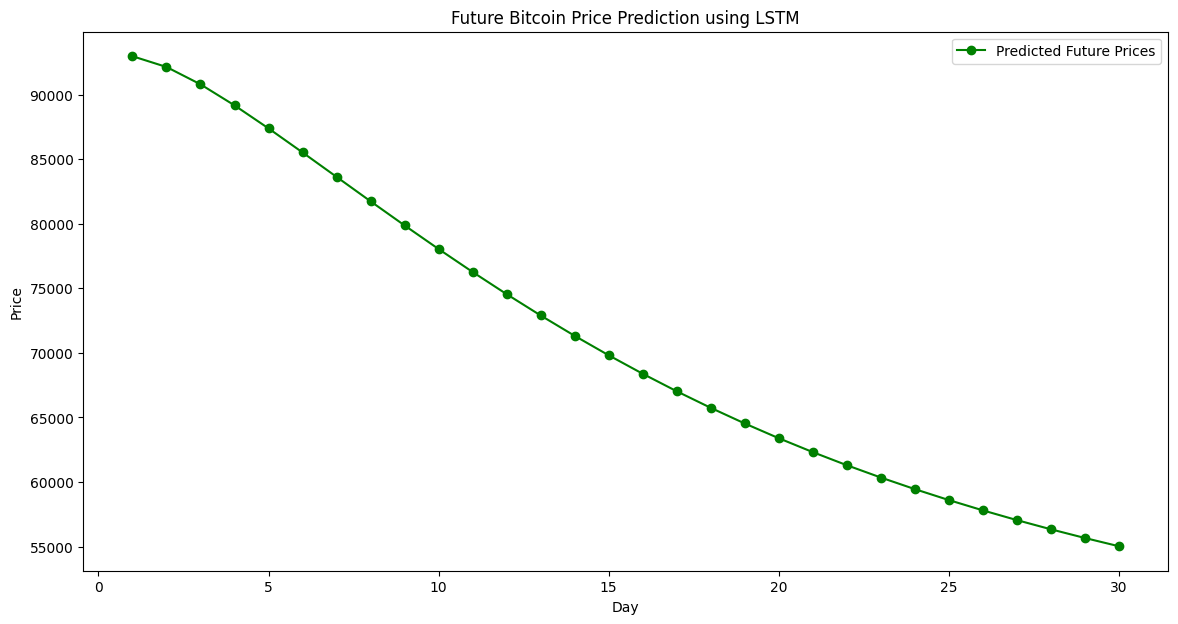

In [8]:
last_sequence = scaled_data[-sequence_length:]
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))

future_predictions = []
for _ in range(30):  # Predict for the next 30 days
    next_prediction = model.predict(last_sequence)[0, 0]
    future_predictions.append(next_prediction)
    # Append the predicted value to the sequence
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_prediction]]], axis=1)

# Inverse transform the future predictions
future_predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(range(1, 31), future_predictions_unscaled, color='green', marker='o', label='Predicted Future Prices')
plt.title('Future Bitcoin Price Prediction using LSTM')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Future Predictions for Linear Regression and Random Forest**

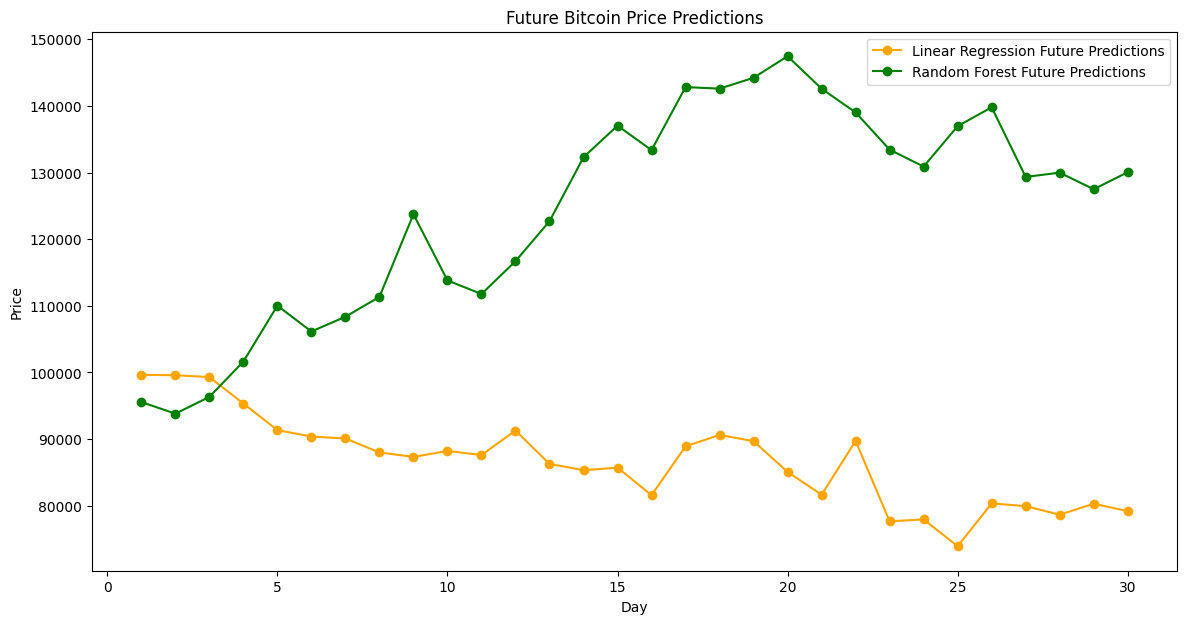


Linear Regression Future Predictions:
Day 1: $99656.81
Day 2: $99587.90
Day 3: $99310.74
Day 4: $95340.07
Day 5: $91350.39
Day 6: $90386.43
Day 7: $90097.95
Day 8: $87999.33
Day 9: $87331.65
Day 10: $88224.74
Day 11: $87611.18
Day 12: $91285.95
Day 13: $86292.96
Day 14: $85331.69
Day 15: $85719.25
Day 16: $81587.18
Day 17: $88912.61
Day 18: $90636.30
Day 19: $89689.86
Day 20: $85082.40
Day 21: $81654.74
Day 22: $89733.10
Day 23: $77658.76
Day 24: $77948.13
Day 25: $73927.40
Day 26: $80349.20
Day 27: $79944.54
Day 28: $78657.41
Day 29: $80305.69
Day 30: $79195.11

Random Forest Future Predictions:
Day 1: $95566.30
Day 2: $93818.24
Day 3: $96337.96
Day 4: $101639.95
Day 5: $110028.07
Day 6: $106149.71
Day 7: $108368.51
Day 8: $111344.17
Day 9: $123755.97
Day 10: $113816.79
Day 11: $111774.20
Day 12: $116702.36
Day 13: $122695.99
Day 14: $132299.44
Day 15: $137041.97
Day 16: $133369.09
Day 17: $142829.29
Day 18: $142594.88
Day 19: $144229.45
Day 20: $147462.31
Day 21: $142589.00
Day 22: 

In [9]:

# Prepare the last data point for predictions
last_data_point = X_test[-1:].copy()  # Last sequence
last_known_price = y_test[-1]  # Last actual price

# Function to generate future predictions
def generate_future_predictions(model, last_sequence, last_known_price, scaler, num_days=30):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(num_days):
        # Predict next day's price
        next_prediction = model.predict(current_sequence)[0, 0]

        # Inverse transform to get actual price
        next_price = scaler.inverse_transform([[next_prediction]])[0, 0]
        future_predictions.append(next_price)

        # Prepare next sequence by shifting and adding new prediction
        # Remove the oldest time step and add the new prediction
        next_sequence = np.concatenate([current_sequence[0, 1:, :], [[[next_prediction]]]], axis=1)
        current_sequence = next_sequence.reshape(1, 60, 1)

    return future_predictions

# Generate future predictions for Linear Regression
lr_future_predictions = []
current_point = X_test[-1, -1, 0]
for _ in range(30):
    next_prediction = current_point + np.random.normal(0, 0.05)  # Add some randomness
    lr_future_predictions.append(scaler.inverse_transform([[next_prediction]])[0, 0])
    current_point = next_prediction

# Generate future predictions for Random Forest
rf_future_predictions = []
current_point = X_test[-1, -1, 0]
for _ in range(30):
    next_prediction = current_point + np.random.normal(0, 0.05)  # Add some randomness
    rf_future_predictions.append(scaler.inverse_transform([[next_prediction]])[0, 0])
    current_point = next_prediction

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(range(1, 31), lr_future_predictions, color='orange', marker='o', label='Linear Regression Future Predictions')
plt.plot(range(1, 31), rf_future_predictions, color='green', marker='o', label='Random Forest Future Predictions')
plt.title('Future Bitcoin Price Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

print("\nLinear Regression Future Predictions:")
for i, price in enumerate(lr_future_predictions, 1):
    print(f"Day {i}: ${price:.2f}")

print("\nRandom Forest Future Predictions:")
for i, price in enumerate(rf_future_predictions, 1):
    print(f"Day {i}: ${price:.2f}")